In [1]:
import numpy as np

In [2]:
def gradient_descent(thetas,X,Y,lr=0.001):
    h = 1/(1+np.exp(X.dot(thetas.T)*-1))
    thetas -= (h-Y).T.dot(X)*lr/X.shape[0]
    return thetas

In [3]:
def loss_hesapla(thetas,X,Y):
    g = X.dot(thetas.T)
    h = 1/(1+np.exp(g*-1))
    return (Y.T.dot(np.log(h)) + (1-Y.T).dot(np.log(1-h)))/(-1*X.shape[0])

In [244]:
def accuracy(modeller,X,Y):
    tahminler_dizi = np.empty((X.shape[0],len(modeller)))
    for i,model in enumerate(modeller):
        thetas = model[1]
        g = X.dot(thetas.T)
        tahminler = 1/(1+np.exp(g*-1))
        tahminler_dizi[:,i:i+1] = tahminler
    sonuc_tahminler = tahminler_dizi.argmax(axis=1).reshape(X.shape[0],1)
    return (sonuc_tahminler == Y).sum() / X.shape[0]

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [6]:
veriler = pd.read_csv("iris.data",header=None)
veriler.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
veriler = shuffle(veriler)
veriler.head()

,0,1,2,3,4
63,6.1,2.9,4.7,1.4,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica


In [8]:
girdiler = veriler.iloc[:,0:4].values
girdiler

array([[6.1, 2.9, 4.7, 1.4],
       [5. , 3.6, 1.4, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 5.1, 1.9],
       [5.8, 2.6, 4. , 1.2],
       [5.8, 2.7, 4.1, 1. ],
       [5.9, 3.2, 4.8, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [5.9, 3. , 4.2, 1.5],
       [7.2, 3.6, 6.1, 2.5],
       [6.7, 3.1, 5.6, 2.4],
       [6.1, 3. , 4.9, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 3.5, 1.6, 0.6],
       [6.4, 3.2, 5.3, 2.3],
       [4.8, 3.1, 1.6, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.2, 2.8, 4.8, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [7.7, 3. , 6.1, 2.3],
       [5.3, 3.7, 1.5, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [5.1, 3

In [9]:
cikti = veriler[4].values
cikti

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'I

In [10]:
X = np.concatenate([np.ones((girdiler.shape[0],1)),girdiler],axis=1)
X

array([[1. , 6.1, 2.9, 4.7, 1.4],
       [1. , 5. , 3.6, 1.4, 0.2],
       [1. , 5.5, 2.5, 4. , 1.3],
       [1. , 6.2, 2.2, 4.5, 1.5],
       [1. , 5.8, 2.7, 5.1, 1.9],
       [1. , 5.8, 2.6, 4. , 1.2],
       [1. , 5.8, 2.7, 4.1, 1. ],
       [1. , 5.9, 3.2, 4.8, 1.8],
       [1. , 4.7, 3.2, 1.6, 0.2],
       [1. , 5.4, 3. , 4.5, 1.5],
       [1. , 5.8, 4. , 1.2, 0.2],
       [1. , 6.7, 3.3, 5.7, 2.5],
       [1. , 5.9, 3. , 4.2, 1.5],
       [1. , 7.2, 3.6, 6.1, 2.5],
       [1. , 6.7, 3.1, 5.6, 2.4],
       [1. , 6.1, 3. , 4.9, 1.8],
       [1. , 6.6, 3. , 4.4, 1.4],
       [1. , 4.9, 2.4, 3.3, 1. ],
       [1. , 5. , 3.5, 1.6, 0.6],
       [1. , 6.4, 3.2, 5.3, 2.3],
       [1. , 4.8, 3.1, 1.6, 0.2],
       [1. , 6.1, 2.6, 5.6, 1.4],
       [1. , 6.8, 2.8, 4.8, 1.4],
       [1. , 6.2, 2.8, 4.8, 1.8],
       [1. , 5.8, 2.7, 3.9, 1.2],
       [1. , 4.3, 3. , 1.1, 0.1],
       [1. , 4.8, 3.4, 1.6, 0.2],
       [1. , 5. , 3.4, 1.6, 0.4],
       [1. , 5.2, 3.4, 1.4, 0.2],
       [1. , 5

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [12]:
siniflar = np.unique(cikti)
siniflar

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
sinif_sayisi = len(siniflar)
sinif_sayisi

3

In [14]:
iterasyon = 10000
model_list = list()

In [15]:
for i in range(sinif_sayisi):
    loss_list = list()
    thetas = np.random.rand(1,X.shape[1])
    temp_cikti = np.zeros((cikti.shape[0],1))
    temp_cikti[cikti == siniflar[i]] = 1.
    for j in range(iterasyon):
        gradient_descent(thetas,X,temp_cikti,lr=0.001)
        loss_list.append(loss_hesapla(thetas,X,temp_cikti))
        if(j%100 == 0):
            print("{0}.Model, {1}.iterasyon, Loss = {2}".format(i+1,j,loss_hesapla(thetas,X,temp_cikti)))
    print("<------------------------------------------------------------>")
    model_list.append([siniflar[i],thetas])

1.Model, 0.iterasyon, Loss = [[6.25143152]]
1.Model, 100.iterasyon, Loss = [[2.96679819]]
1.Model, 200.iterasyon, Loss = [[0.8622067]]
1.Model, 300.iterasyon, Loss = [[0.60219312]]
1.Model, 400.iterasyon, Loss = [[0.55296877]]
1.Model, 500.iterasyon, Loss = [[0.51809268]]
1.Model, 600.iterasyon, Loss = [[0.48696393]]
1.Model, 700.iterasyon, Loss = [[0.45856461]]
1.Model, 800.iterasyon, Loss = [[0.43260663]]
1.Model, 900.iterasyon, Loss = [[0.40887048]]
1.Model, 1000.iterasyon, Loss = [[0.38715185]]
1.Model, 1100.iterasyon, Loss = [[0.36725969]]
1.Model, 1200.iterasyon, Loss = [[0.34901749]]
1.Model, 1300.iterasyon, Loss = [[0.33226388]]
1.Model, 1400.iterasyon, Loss = [[0.3168525]]
1.Model, 1500.iterasyon, Loss = [[0.30265134]]
1.Model, 1600.iterasyon, Loss = [[0.28954182]]
1.Model, 1700.iterasyon, Loss = [[0.27741778]]
1.Model, 1800.iterasyon, Loss = [[0.26618433]]
1.Model, 1900.iterasyon, Loss = [[0.25575674]]
1.Model, 2000.iterasyon, Loss = [[0.2460594]]
1.Model, 2100.iterasyon, Los

2.Model, 8100.iterasyon, Loss = [[0.58360448]]
2.Model, 8200.iterasyon, Loss = [[0.58336774]]
2.Model, 8300.iterasyon, Loss = [[0.58313255]]
2.Model, 8400.iterasyon, Loss = [[0.58289885]]
2.Model, 8500.iterasyon, Loss = [[0.58266659]]
2.Model, 8600.iterasyon, Loss = [[0.58243573]]
2.Model, 8700.iterasyon, Loss = [[0.58220621]]
2.Model, 8800.iterasyon, Loss = [[0.581978]]
2.Model, 8900.iterasyon, Loss = [[0.58175106]]
2.Model, 9000.iterasyon, Loss = [[0.58152536]]
2.Model, 9100.iterasyon, Loss = [[0.58130085]]
2.Model, 9200.iterasyon, Loss = [[0.58107751]]
2.Model, 9300.iterasyon, Loss = [[0.58085531]]
2.Model, 9400.iterasyon, Loss = [[0.58063422]]
2.Model, 9500.iterasyon, Loss = [[0.58041421]]
2.Model, 9600.iterasyon, Loss = [[0.58019526]]
2.Model, 9700.iterasyon, Loss = [[0.57997734]]
2.Model, 9800.iterasyon, Loss = [[0.57976044]]
2.Model, 9900.iterasyon, Loss = [[0.57954453]]
<------------------------------------------------------------>
3.Model, 0.iterasyon, Loss = [[3.64901143]]
3.

In [16]:
model_list

[['Iris-setosa',
  array([[ 0.76339212,  0.1607211 ,  0.91518778, -1.59375442, -0.22184602]])],
 ['Iris-versicolor',
  array([[ 0.59612588, -0.15223662, -0.54604889,  0.25092247,  0.17883705]])],
 ['Iris-virginica',
  array([[ 0.01041573, -0.54136272, -0.94534276,  0.92827903,  0.97977172]])]]

In [17]:
indis = 50

In [18]:
maks = -1.
maks_model_indis = -1
for i in range(sinif_sayisi):
    thetas_temp = model_list[i][1]
    tahmin = (1/(1+np.exp(X[indis].dot(thetas_temp.T)*-1)))
    if(tahmin > maks):
        maks = tahmin
        maks_model_indis = i

In [19]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],model_list[maks_model_indis][0]))

Gercek = Iris-virginica, Tahmin = Iris-virginica


In [20]:
print("Tahmin Skoru = {}".format(maks))

Tahmin Skoru = [0.76173767]


# Mnist Datasetiyle

In [132]:
import scipy.io
mat = scipy.io.loadmat('ex3data1.mat')

In [133]:
X = np.concatenate([np.ones((mat['X'].shape[0],1)),mat['X']],axis=1)
X.shape

(5000, 401)

In [134]:
resimler = mat['X'].reshape((-1,20,20),order='F')
etiketler = mat['y']

In [135]:
etiketler[etiketler == 10] = 0

In [136]:
import matplotlib.pyplot as plt

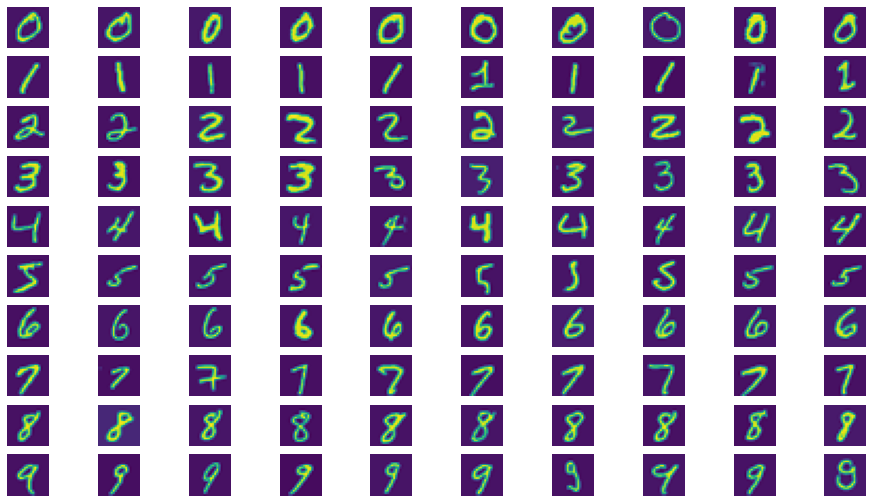

In [137]:
fig, ax = plt.subplots(10,10,figsize=(16,9))

for i in range(10):
    temp = resimler[etiketler[:,0] == i]
    for j in range(10):
        ax[i,j].axis("off")
        ax[i,j].imshow(temp[j])
        
plt.show()

In [138]:
siniflar = np.unique(etiketler)
siniflar

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [139]:
sinif_sayisi = len(siniflar)
sinif_sayisi

10

In [140]:
iterasyon = 2500
model_list = list()

In [30]:
for i in range(sinif_sayisi):
    loss_list = list()
    #thetas = np.ones((1,X.shape[1]))
    thetas = np.random.randn(1,X.shape[1])
    temp_cikti = np.zeros((etiketler.shape[0],1),dtype=int)
    temp_cikti[etiketler == siniflar[i]] = 1
    for j in range(iterasyon):
        thetas = gradient_descent(thetas,X,temp_cikti,lr=0.001)
        loss_list.append(loss_hesapla(thetas,X,temp_cikti))
        if(j%100 == 0):
            print("{0}.Model, {1}.iterasyon, Loss = {2}".format(i+1,j,loss_hesapla(thetas,X,temp_cikti)))
    print("<------------------------------------------------------------>")
    model_list.append([siniflar[i],thetas])

1.Model, 0.iterasyon, Loss = [[4.26193041]]
1.Model, 100.iterasyon, Loss = [[3.37133761]]
1.Model, 200.iterasyon, Loss = [[2.67921909]]
1.Model, 300.iterasyon, Loss = [[2.16141495]]
1.Model, 400.iterasyon, Loss = [[1.78320074]]
1.Model, 500.iterasyon, Loss = [[1.50875659]]
1.Model, 600.iterasyon, Loss = [[1.30799174]]
1.Model, 700.iterasyon, Loss = [[1.15912338]]
1.Model, 800.iterasyon, Loss = [[1.04701828]]
1.Model, 900.iterasyon, Loss = [[0.96113249]]
1.Model, 1000.iterasyon, Loss = [[0.89410672]]
1.Model, 1100.iterasyon, Loss = [[0.84079487]]
1.Model, 1200.iterasyon, Loss = [[0.79757579]]
1.Model, 1300.iterasyon, Loss = [[0.76187976]]
1.Model, 1400.iterasyon, Loss = [[0.73186603]]
1.Model, 1500.iterasyon, Loss = [[0.70620232]]
1.Model, 1600.iterasyon, Loss = [[0.68391332]]
1.Model, 1700.iterasyon, Loss = [[0.66427661]]
1.Model, 1800.iterasyon, Loss = [[0.64675081]]
1.Model, 1900.iterasyon, Loss = [[0.63092569]]
1.Model, 2000.iterasyon, Loss = [[0.61648714]]
1.Model, 2100.iterasyon, 

7.Model, 1900.iterasyon, Loss = [[0.80599907]]
7.Model, 2000.iterasyon, Loss = [[0.79308509]]
7.Model, 2100.iterasyon, Loss = [[0.7812916]]
7.Model, 2200.iterasyon, Loss = [[0.77041831]]
7.Model, 2300.iterasyon, Loss = [[0.76030691]]
7.Model, 2400.iterasyon, Loss = [[0.75083142]]
<------------------------------------------------------------>
8.Model, 0.iterasyon, Loss = [[4.18876471]]
8.Model, 100.iterasyon, Loss = [[3.23432681]]
8.Model, 200.iterasyon, Loss = [[2.49750261]]
8.Model, 300.iterasyon, Loss = [[1.95188997]]
8.Model, 400.iterasyon, Loss = [[1.55833827]]
8.Model, 500.iterasyon, Loss = [[1.27656355]]
8.Model, 600.iterasyon, Loss = [[1.07337091]]
8.Model, 700.iterasyon, Loss = [[0.92506033]]
8.Model, 800.iterasyon, Loss = [[0.81533025]]
8.Model, 900.iterasyon, Loss = [[0.73290655]]
8.Model, 1000.iterasyon, Loss = [[0.66998814]]
8.Model, 1100.iterasyon, Loss = [[0.62117714]]
8.Model, 1200.iterasyon, Loss = [[0.58271148]]
8.Model, 1300.iterasyon, Loss = [[0.55194003]]
8.Model, 1

In [31]:
print("Accuracy = ",accuracy(model_list,X,etiketler))

Accuracy =  0.771


In [32]:
indis = 900

In [33]:
maks = -1.
maks_model_indis = -1
for i in range(sinif_sayisi):
    thetas_temp = model_list[i][1]
    tahmin = (1/(1+np.exp(X[indis].dot(thetas_temp.T)*-1)))
    if(tahmin > maks):
        maks = tahmin
        maks_model_indis = i

In [34]:
print("Gercek = {0}, Tahmin = {1}".format(etiketler[indis],model_list[maks_model_indis][0]))

Gercek = [1], Tahmin = 1


In [35]:
print("Tahmin Skoru = {}".format(maks))

Tahmin Skoru = [0.00719616]


# Reguralizasyon ile

In [238]:
reguralizasyon_degeri = 100

In [239]:
def loss_hesapla_reg(thetas,X,Y,reg_katsayi=reguralizasyon_degeri):
    temp = thetas.copy()
    temp[0,0] = 0.0
    g = X.dot(thetas.T)
    h = 1/(1+np.exp(g*-1))
    return -1*np.sum((Y.T.dot(np.log(h)) + (1-Y.T).dot(np.log(1-h))))/X.shape[0] + reg_katsayi*np.sum(temp**2)/(2*X.shape[0])

In [240]:
def gradient_descent_reg(thetas,X,Y,reg_katsayi=reguralizasyon_degeri,lr=0.001):
    g = X.dot(thetas.T)
    h = 1/(1+np.exp(g*-1))
    temp = thetas[0,0:1]*lr*reg_katsayi/X.shape[0]
    thetas = thetas*(1-lr*reg_katsayi/X.shape[0]) - (h-Y).T.dot(X)*lr/(X.shape[0])
    thetas[0,0:1] += temp
    return thetas

In [241]:
model_list = list()
for i in range(sinif_sayisi):
    loss_list = list()
    #thetas = np.ones((1,X.shape[1]))
    thetas = np.random.randn(1,X.shape[1])
    temp_cikti = np.zeros((etiketler.shape[0],1),dtype=int)
    temp_cikti[etiketler == siniflar[i]] = 1
    for j in range(iterasyon):
        thetas = gradient_descent_reg(thetas,X,temp_cikti,lr=0.001)
        loss_list.append(loss_hesapla_reg(thetas,X,temp_cikti))
        if(j%100 == 0):
            print("{0}.Model, {1}.iterasyon, Loss = {2}".format(i+1,j,loss_hesapla_reg(thetas,X,temp_cikti)))
    print("<------------------------------------------------------------>")
    model_list.append([siniflar[i],thetas])   

1.Model, 0.iterasyon, Loss = 8.03760867611074
1.Model, 100.iterasyon, Loss = 7.118837122005493
1.Model, 200.iterasyon, Loss = 6.401985368319185
1.Model, 300.iterasyon, Loss = 5.86228553041572
1.Model, 400.iterasyon, Loss = 5.46430646421692
1.Model, 500.iterasyon, Loss = 5.1715522216014245
1.Model, 600.iterasyon, Loss = 4.953445355036161
1.Model, 700.iterasyon, Loss = 4.7878734035447374
1.Model, 800.iterasyon, Loss = 4.659472743537899
1.Model, 900.iterasyon, Loss = 4.557549343855409
1.Model, 1000.iterasyon, Loss = 4.474653805052767
1.Model, 1100.iterasyon, Loss = 4.405587940302472
1.Model, 1200.iterasyon, Loss = 4.346701926737493
1.Model, 1300.iterasyon, Loss = 4.29541156920521
1.Model, 1400.iterasyon, Loss = 4.249869856957502
1.Model, 1500.iterasyon, Loss = 4.20874257690323
1.Model, 1600.iterasyon, Loss = 4.171054696940724
1.Model, 1700.iterasyon, Loss = 4.136085099715667
1.Model, 1800.iterasyon, Loss = 4.103294163223495
1.Model, 1900.iterasyon, Loss = 4.072273554185442
1.Model, 2000.i

7.Model, 800.iterasyon, Loss = 4.816649567081326
7.Model, 900.iterasyon, Loss = 4.714071743605526
7.Model, 1000.iterasyon, Loss = 4.631026728686688
7.Model, 1100.iterasyon, Loss = 4.562138388607783
7.Model, 1200.iterasyon, Loss = 4.503655206099263
7.Model, 1300.iterasyon, Loss = 4.4529300845065505
7.Model, 1400.iterasyon, Loss = 4.408072385099139
7.Model, 1500.iterasyon, Loss = 4.367714294763862
7.Model, 1600.iterasyon, Loss = 4.33085317666454
7.Model, 1700.iterasyon, Loss = 4.296744542626523
7.Model, 1800.iterasyon, Loss = 4.264828759590085
7.Model, 1900.iterasyon, Loss = 4.234680309339998
7.Model, 2000.iterasyon, Loss = 4.205972228045077
7.Model, 2100.iterasyon, Loss = 4.178450858209205
7.Model, 2200.iterasyon, Loss = 4.1519176859642055
7.Model, 2300.iterasyon, Loss = 4.1262161086446225
7.Model, 2400.iterasyon, Loss = 4.10122167891858
<------------------------------------------------------------>
8.Model, 0.iterasyon, Loss = 7.964445881277415
8.Model, 100.iterasyon, Loss = 6.98226092

In [243]:
print("Accuracy = ",accuracy(model_list,X,etiketler))

Accuracy =  0.7718
